In [1]:
# Import the required functionality
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline  

from sklearn.impute import KNNImputer 
from sklearn.decomposition import PCA  #principal components Analysis
from sklearn.cluster import KMeans  # clustering
from sklearn.metrics import silhouette_score #evaluation metric for # of clusters
from adjustText import adjust_text  #pip install adjustText
from sklearn.model_selection import cross_val_predict

from pandas.plotting import scatter_matrix
from sklearn.neural_network import MLPClassifier

from sklearn import neighbors
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error   #RMSE

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import LinearRegression,Lasso, Ridge,RidgeCV, LassoCV
from sklearn.model_selection import GridSearchCV
from dmba import plotDecisionTree
import pydotplus
from sklearn import tree
import pydot
import graphviz
import math
import itertools

import warnings
warnings.filterwarnings('ignore')

no display found. Using non-interactive Agg backend


<font size = "4"><font color='blue'><br>1. DATA EXPLORATION</br>

In [2]:
df = pd.read_csv('WINE_.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
INDEX                 12795 non-null int64
TARGET                12795 non-null int64
FixedAcidity          12795 non-null float64
VolatileAcidity       12795 non-null float64
CitricAcid            12795 non-null float64
ResidualSugar         12179 non-null float64
Chlorides             12157 non-null float64
FreeSulfurDioxide     12148 non-null float64
TotalSulfurDioxide    12113 non-null float64
Density               12795 non-null float64
pH                    12400 non-null float64
Sulphates             11585 non-null float64
Alcohol               12142 non-null float64
LabelAppeal           12795 non-null int64
AcidIndex             12795 non-null int64
STARS                 9436 non-null float64
dtypes: float64(12), int64(4)
memory usage: 1.6 MB


A priliminary scan of the data indicates a lot of missing values for the features. 

The STARS feature in particular has 26.25% of data missing

In [3]:
for x in ['TARGET','LabelAppeal','STARS']:
    print(df[x].value_counts().shape)

(9,)
(5,)
(4,)


5 different types of Label Appeal values and 4 types of STAR ratings for the data

Lower STAR rating results in lesser number of wine TARGETS being sampled. Hence, the missing values can be imputed as 0 for STAR

In [4]:
# Mean, SD and Min-MAx of all the features

df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


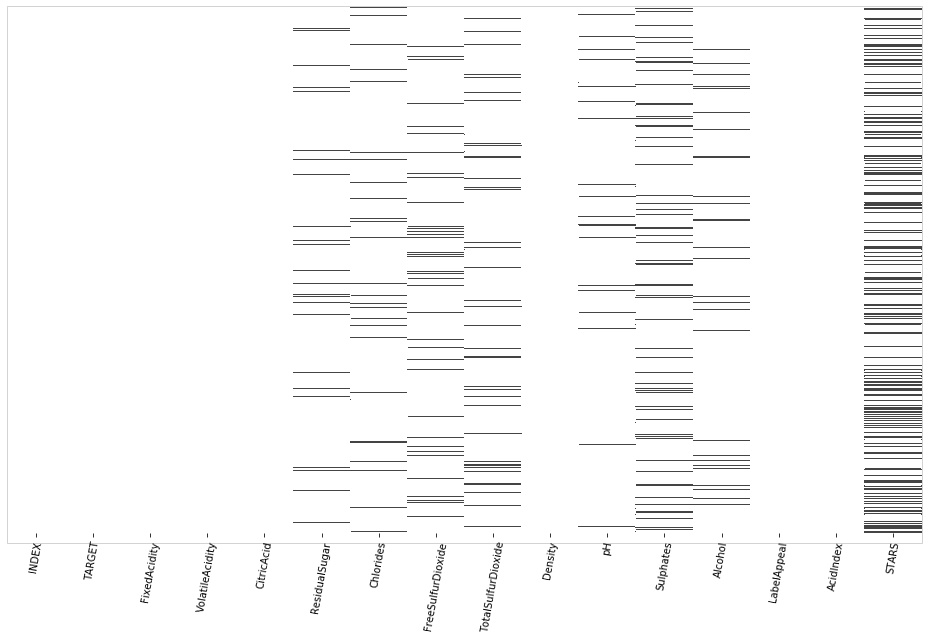

In [5]:
# Exploring data for missing values using HeatMap

naInfo = np.zeros(df.shape)
naInfo[df.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=df.columns)

fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "#444444"], cbar=False, ax=ax)
ax.set_yticks([])

rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1, 
                     edgecolor='lightgrey',facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)

plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [6]:
# Counting the missing values in the data

print(df.isnull().sum())

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


In [7]:
# Imputing missing values in STAR column with 0s

df['STARS'] = df['STARS'].fillna(0)

In [8]:
# Scaling the data using MinMax scaler

scaler = preprocessing.MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
scaled_data.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0.000000,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,0.344640,0.467949,0.50,0.307692,0.50
1,0.000062,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,0.519674,NaN,0.25,0.230769,0.75
2,0.000186,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,0.489824,0.855769,0.25,0.307692,0.75
3,0.000248,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,0.672999,0.349359,0.25,0.153846,0.25
4,0.000310,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,0.664858,0.589744,0.50,0.384615,0.50


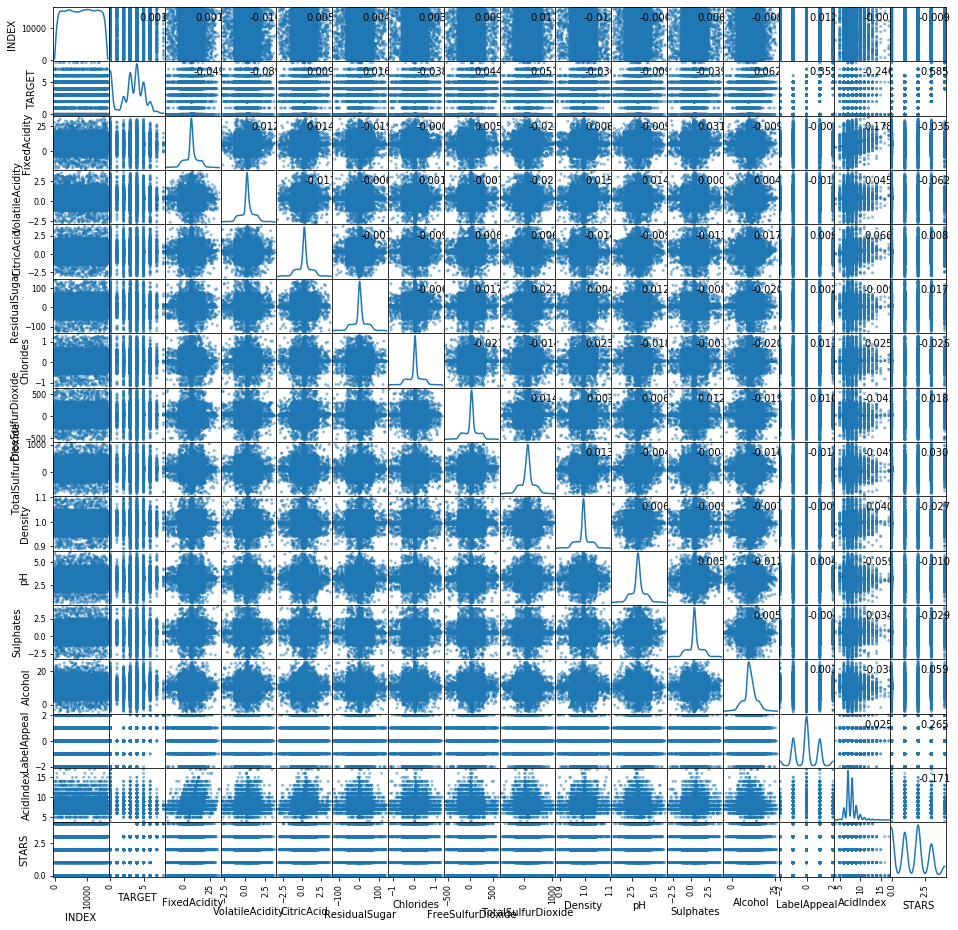

In [9]:
# Scatter Plot

axes = scatter_matrix(df, alpha=0.5, diagonal='kde',figsize=(16, 16))
corr = scaled_data.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

The Scatter plots indicate that lower Label Appeal implies lesser number of TARGET samples.


The plot of TARGEt vs STARS show greater the STAR rating, higher the number of TARGET samples sold

The scatter plots also indicate that there is no correlation between features like Ciric Acid, Acid content, Fixed Acidity etc.

The plots do not show any outlier for the features

In [10]:
scaled_data.corr()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
INDEX,1.000000,0.001256,0.001133,-0.010224,0.004922,0.003846,0.002966,0.009257,0.010756,-0.010779,-0.005853,0.006413,-0.007677,0.011553,-0.007097,-0.008883
TARGET,0.001256,1.000000,-0.049011,-0.088793,0.008685,0.016491,-0.038263,0.043824,0.051478,-0.035518,-0.009445,-0.038850,0.062062,0.356500,-0.246049,0.685381
FixedAcidity,0.001133,-0.049011,1.000000,0.012375,0.014240,-0.018855,-0.000457,0.004972,-0.022498,0.006477,-0.008983,0.030783,-0.009371,-0.003366,0.178437,-0.035416
VolatileAcidity,-0.010224,-0.088793,0.012375,1.000000,-0.016953,-0.006483,0.000987,-0.007077,-0.021080,0.014735,0.013592,0.000129,0.004073,-0.016987,0.044642,-0.062276
CitricAcid,0.004922,0.008685,0.014240,-0.016953,1.000000,-0.006940,-0.008567,0.006428,0.006320,-0.013952,-0.008709,-0.012989,0.017046,0.008650,0.065697,0.008485
ResidualSugar,0.003846,0.016491,-0.018855,-0.006483,-0.006940,1.000000,-0.005594,0.017493,0.022479,0.004101,0.012118,-0.007723,-0.019998,0.002320,-0.009414,0.017203
Chlorides,0.002966,-0.038263,-0.000457,0.000987,-0.008567,-0.005594,1.000000,-0.020661,-0.013994,0.022657,-0.017605,-0.003290,-0.019695,0.010509,0.025238,-0.024547
FreeSulfurDioxide,0.009257,0.043824,0.004972,-0.007077,0.006428,0.017493,-0.020661,1.000000,0.013720,0.003176,0.006049,0.011593,-0.018588,0.010294,-0.041717,0.018171
TotalSulfurDioxide,0.010756,0.051478,-0.022498,-0.021080,0.006320,0.022479,-0.013994,0.013720,1.000000,0.012816,-0.004343,-0.007133,-0.015957,-0.009747,-0.049311,0.029688
Density,-0.010779,-0.035518,0.006477,0.014735,-0.013952,0.004101,0.022657,0.003176,0.012816,1.000000,0.005768,-0.009059,-0.007215,-0.009370,0.040413,-0.026567


Strong positive correlation between TARGET and (LabelAppeal & STARS)

Strong negative correlation between TARGET and AcidIndex

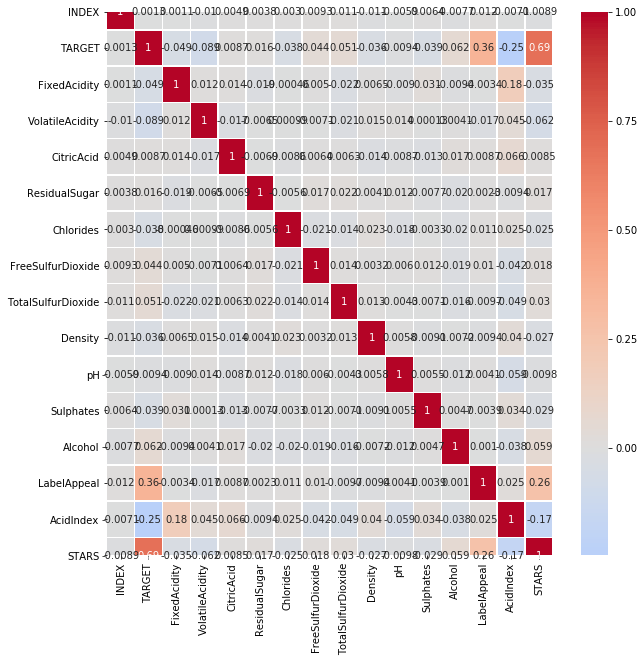

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(scaled_data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

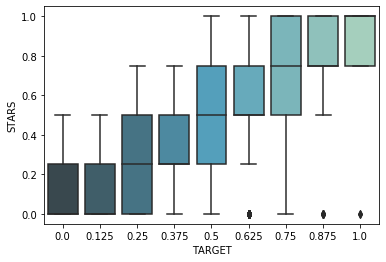

In [12]:
sns.boxplot(x=scaled_data["TARGET"],y=scaled_data["STARS"],data=scaled_data,palette='GnBu_d')

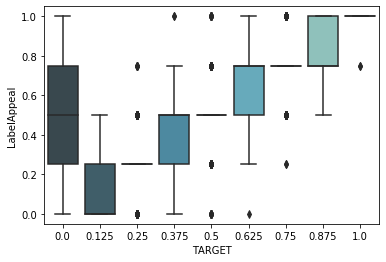

In [13]:
sns.boxplot(x=scaled_data["TARGET"],y=scaled_data["LabelAppeal"],data=scaled_data,palette='GnBu_d')

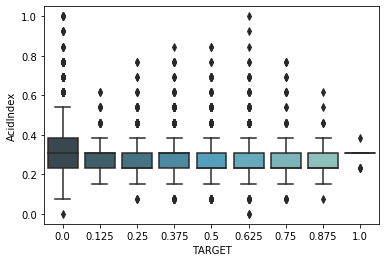

In [14]:
sns.boxplot(x=scaled_data["TARGET"],y=scaled_data["AcidIndex"],data=scaled_data,palette='GnBu_d')

<font size = "4"><font color='blue'><br>2. DATA PREPARATION</br>

In [15]:
scaled_data.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0.000000,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,0.344640,0.467949,0.50,0.307692,0.50
1,0.000062,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,0.519674,NaN,0.25,0.230769,0.75
2,0.000186,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,0.489824,0.855769,0.25,0.307692,0.75
3,0.000248,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,0.672999,0.349359,0.25,0.153846,0.25
4,0.000310,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,0.664858,0.589744,0.50,0.384615,0.50


In [16]:
scaled_data = scaled_data.drop("INDEX", axis = 1)

In [17]:
scaled_data.head(10)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,0.344640,0.467949,0.50,0.307692,0.50
1,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,0.519674,NaN,0.25,0.230769,0.75
2,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,0.489824,0.855769,0.25,0.307692,0.75
3,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,0.672999,0.349359,0.25,0.153846,0.25
4,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,0.664858,0.589744,0.50,0.384615,0.50
5,0.000,0.560000,0.480680,0.539437,0.483361,0.684774,0.439728,0.445745,0.527161,0.481416,0.599729,0.644231,0.50,0.538462,0.00
6,0.000,0.491429,0.476043,0.400000,0.555122,0.488105,0.714771,0.520745,0.509732,0.532743,0.588874,0.480769,0.50,0.307692,0.00
7,0.500,0.468571,0.242658,0.504225,0.480387,0.480174,0.915110,0.730851,0.683258,0.481416,NaN,0.522436,0.75,0.230769,0.75
8,0.375,0.626667,0.472952,0.604225,0.517011,0.461538,0.290323,NaN,0.512006,0.787611,0.459973,0.631410,0.50,0.153846,0.00
9,0.750,0.449524,0.397218,0.511268,0.481874,0.354481,0.523769,0.533511,0.280133,0.461947,0.526459,0.554487,0.50,0.307692,1.00


In [18]:
#Create flags to suggest if a variable was missing

missing_cols = ['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol', 'STARS']
for col in missing_cols:
    scaled_data[col+"_missing"] = np.where(scaled_data[col].isnull(), 0, 1)
    
scaled_data.head(10)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,AcidIndex,STARS,ResidualSugar_missing,Chlorides_missing,FreeSulfurDioxide_missing,TotalSulfurDioxide_missing,pH_missing,Sulphates_missing,Alcohol_missing,STARS_missing
0,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,NaN,0.580319,0.495903,0.504425,...,0.307692,0.50,1,1,0,1,1,1,1,1
1,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,...,0.230769,0.75,1,1,1,1,1,1,0,1
2,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,...,0.307692,0.75,1,1,1,1,1,1,1,1
3,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,...,0.153846,0.25,1,1,1,1,1,1,1,1
4,0.500,0.497143,0.482226,0.278873,0.510132,NaN,0.329372,0.495213,0.504286,0.467257,...,0.384615,0.50,1,0,1,1,1,1,1,1
5,0.000,0.560000,0.480680,0.539437,0.483361,0.684774,0.439728,0.445745,0.527161,0.481416,...,0.538462,0.00,1,1,1,1,1,1,1,1
6,0.000,0.491429,0.476043,0.400000,0.555122,0.488105,0.714771,0.520745,0.509732,0.532743,...,0.307692,0.00,1,1,1,1,1,1,1,1
7,0.500,0.468571,0.242658,0.504225,0.480387,0.480174,0.915110,0.730851,0.683258,0.481416,...,0.230769,0.75,1,1,1,1,1,0,1,1
8,0.375,0.626667,0.472952,0.604225,0.517011,0.461538,0.290323,NaN,0.512006,0.787611,...,0.153846,0.00,1,1,1,0,1,1,1,1
9,0.750,0.449524,0.397218,0.511268,0.481874,0.354481,0.523769,0.533511,0.280133,0.461947,...,0.307692,1.00,1,1,1,1,1,1,1,1


In [19]:
# Add median values (IMPUTE) to the missing values in the columns

imputer = KNNImputer(n_neighbors=2)  #impute missing values
scaled_data.iloc[:,1:]=imputer.fit_transform(scaled_data.iloc[:,1:]) #replace df with imputed missing values
scaled_data.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,AcidIndex,STARS,ResidualSugar_missing,Chlorides_missing,FreeSulfurDioxide_missing,TotalSulfurDioxide_missing,pH_missing,Sulphates_missing,Alcohol_missing,STARS_missing
0,0.375,0.405714,0.610510,0.318310,0.676706,0.239492,0.353990,0.580319,0.495903,0.504425,...,0.307692,0.50,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.375,0.430476,0.455951,0.342254,0.572225,0.295797,0.483871,0.263830,0.662231,0.513274,...,0.230769,0.75,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0.625,0.480000,0.839258,0.332394,0.530210,0.478985,0.652801,0.513298,0.507175,0.467257,...,0.307692,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.375,0.453333,0.490726,0.461972,0.545083,0.295797,0.489813,0.498936,0.512953,0.311504,...,0.153846,0.25,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.500,0.497143,0.482226,0.278873,0.510132,0.475020,0.329372,0.495213,0.504286,0.467257,...,0.384615,0.50,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


#### Transform data by putting it into buckets(discretization):

3 important wine features that customers often look for are chosen and discretized/bucketed into different bins.

- Label Appeal    : "Low_Appeal","Moderately_Low_Appeal", "Moderately_High_Appeal", "High_Appeal"
- pH level        : "Very_Low", "Moderate", "Very_High"
- Alcohol content : "V_Low_Alcohol", "Low_Alcohol", "High_Alcohol", "V_High_Alcohol"
- STARS           :


In [20]:
scaled_data.groupby(['LabelAppeal']).size()

LabelAppeal
0.00     504
0.25    3136
0.50    5617
0.75    3048
1.00     490
dtype: int64

In [21]:
scaled_data['LabelAppeal_bin']=pd.cut(x=scaled_data['LabelAppeal'], bins=[0,0.25,.50,0.75,1], labels=["Low_Appeal","Moderately_Low_Appeal", "Moderately_High_Appeal", "High_Appeal"])
scaled_data['LabelAppeal_bin'].value_counts()

Moderately_Low_Appeal     5617
Low_Appeal                3136
Moderately_High_Appeal    3048
High_Appeal                490
Name: LabelAppeal_bin, dtype: int64

#### Winemakers use pH as a way to measure ripeness in relation to acidity. 

- Low pH wines will taste tart and crisp, while higher pH wines are more susceptible to bacterial growth. 
- Most wine pH's fall around 3 or 4; about 3.0 to 3.4 is desirable for white wines, while about 3.3 to 3.6 is best for reds.

In [22]:
scaled_data['pH'].describe()

count    12795.000000
mean         0.482784
std          0.119271
min          0.000000
25%          0.438938
50%          0.481416
75%          0.529204
max          1.000000
Name: pH, dtype: float64

In [23]:
scaled_data['pH_bin']=pd.cut(x=scaled_data['pH'], bins=3, labels=["Very_Low","Moderate","Very_High"])
scaled_data['pH_bin'].value_counts()

Moderate     10525
Very_Low      1375
Very_High      895
Name: pH_bin, dtype: int64

#### The average glass of wine contains around 11% to 13% alcohol, but bottles range from as little as 5.5% alcohol by volume to as much as around 20% ABV. 

- Very Low (Below 12.5 Percent)
- Low (12.5 to 13.5 Percent)
- High (13.5 to 14.5 Percent)
- Very High (More Than 14.5 Percent)

In [24]:
scaled_data['Alcohol'].describe()

count    12795.000000
mean         0.486883
std          0.117976
min          0.000000
25%          0.439103
50%          0.483974
75%          0.546474
max          1.000000
Name: Alcohol, dtype: float64

In [25]:
scaled_data['Alcohol_bin']=pd.cut(x=scaled_data['Alcohol'], bins=4, labels=["V_Low_Alcohol","Low_Alcohol","High_Alcohol", "V_High_Alcohol"])
scaled_data['Alcohol_bin'].value_counts()

Low_Alcohol       7171
High_Alcohol      5058
V_Low_Alcohol      328
V_High_Alcohol     238
Name: Alcohol_bin, dtype: int64

In [26]:
scaled_data.groupby(['STARS']).size()

STARS
0.00    3359
0.25    3042
0.50    3570
0.75    2212
1.00     612
dtype: int64

In [27]:
scaled_data['STARS_bin']=pd.cut(x=scaled_data['STARS'], bins=3, labels=["Low_Rating","Moderate_Rating","High_Rating"])
scaled_data['STARS_bin'].value_counts()

Low_Rating         6401
Moderate_Rating    3570
High_Rating        2824
Name: STARS_bin, dtype: int64

In [28]:
# Mathematical Transformation

# Checking the Skewness of the data

scaled_data.skew(axis = 0, skipna = True)

TARGET                       -0.326378
FixedAcidity                 -0.022591
VolatileAcidity               0.020385
CitricAcid                   -0.050319
ResidualSugar                -0.051587
Chlorides                     0.030444
FreeSulfurDioxide             0.002126
TotalSulfurDioxide           -0.007851
Density                      -0.018698
pH                            0.045805
Sulphates                     0.005650
Alcohol                      -0.027085
LabelAppeal                   0.008431
AcidIndex                     1.648883
STARS                         0.254900
ResidualSugar_missing        -4.222068
Chlorides_missing            -4.136587
FreeSulfurDioxide_missing    -4.102816
TotalSulfurDioxide_missing   -3.977563
pH_missing                   -5.425049
Sulphates_missing            -2.771394
Alcohol_missing              -4.080670
STARS_missing                 0.000000
dtype: float64

- If skewness value lies above +1 or below -1, data is highly skewed. 
- If it lies between +0.5 to -0.5, it is moderately skewed. 
- If the value is 0, then the data is symmetric

The AcidIndex feature is highly positively skewed with a value of 1.648883 (> 1). Hence Square Root transformation can be applied to this feature

The missing value columns are not transformed since they are added only to indicate any missing values and hence do not posses any mathematical importance as such

In [29]:
#Square root transformation, Applied to positive values only

scaled_data["AcidIndex"] = scaled_data["AcidIndex"]**(1/2)
scaled_data.skew(axis = 0, skipna = True)

TARGET                       -0.326378
FixedAcidity                 -0.022591
VolatileAcidity               0.020385
CitricAcid                   -0.050319
ResidualSugar                -0.051587
Chlorides                     0.030444
FreeSulfurDioxide             0.002126
TotalSulfurDioxide           -0.007851
Density                      -0.018698
pH                            0.045805
Sulphates                     0.005650
Alcohol                      -0.027085
LabelAppeal                   0.008431
AcidIndex                     0.767241
STARS                         0.254900
ResidualSugar_missing        -4.222068
Chlorides_missing            -4.136587
FreeSulfurDioxide_missing    -4.102816
TotalSulfurDioxide_missing   -3.977563
pH_missing                   -5.425049
Sulphates_missing            -2.771394
Alcohol_missing              -4.080670
STARS_missing                 0.000000
dtype: float64

In [30]:
# Combine variable

From the correlation table, every feature is poorly correlated with every other feature. Hence no two variables/features are similar and therefore cannot be combined to create any new meaningful variable

In [31]:
# PCA

scaler_pca = preprocessing.MinMaxScaler()
pcs = PCA(whiten=True) #all features
scores = pd.DataFrame(pcs.fit_transform(scaler_pca.fit_transform(scaled_data.iloc[:,0:15])),
                      columns=['PC{}'.format(i) for i in range(0, 15)]) #Creating 15 PCA components
scores.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.255039,-0.245119,-0.364650,0.391278,0.970581,2.406447,1.720933,0.674460,-0.568341,-0.375579,-1.219698,-0.709594,-0.398224,-0.025500,-0.630085
1,0.575043,-1.770875,-1.080317,0.354620,0.701670,0.129278,1.524613,1.442357,-0.055401,-0.969879,1.516785,-1.447145,-0.057910,-0.264004,0.293357
2,0.965716,-1.770304,0.142900,0.106866,0.262462,-0.482989,1.074396,1.839322,1.138970,-1.294314,-1.010165,1.396062,-2.417098,2.308680,-1.046044
3,-0.457255,-0.940122,0.935361,-0.629823,0.881113,-0.299460,0.339886,0.565369,-1.217924,0.145727,-0.122643,-0.775735,-1.001239,-1.789564,1.613222
4,0.432116,-0.186139,-0.096961,-0.151235,-0.678751,-0.079686,0.242310,1.739859,-1.812462,-0.024293,-0.089551,-0.503214,-0.437241,0.724031,-1.290529


Considering all the features in the dataset for PCA except for the missing_variable columns added to indicate missing variables since they don't add any valuable analytical information for PCA

In [32]:
# Explained variance by component

pcsSummary = pd.DataFrame({'Explained Variance': pcs.explained_variance_, #explained variance
                           'Explained Variance Ratio': pcs.explained_variance_ratio_,  #explained variance ratio
                           'Cumulative Proportion': np.cumsum(pcs.explained_variance_ratio_)}) #cumulative %
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = scores.columns
pcsSummary

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Explained Variance,0.132649,0.043030,0.021446,0.016138,0.016081,0.015672,0.015298,0.015142,0.014946,0.014691,0.014329,0.014246,0.014092,0.013398,0.006714
Explained Variance Ratio,0.360584,0.116970,0.058296,0.043869,0.043714,0.042603,0.041584,0.041162,0.040628,0.039934,0.038952,0.038726,0.038307,0.036421,0.018251
Cumulative Proportion,0.360584,0.477553,0.535849,0.579719,0.623433,0.666036,0.707620,0.748782,0.789410,0.829344,0.868296,0.907021,0.945329,0.981749,1.000000


From the Explained Variance for each component, it is seen that PC0 component explains 13.27% variance within the data, PC1 explains 4.3% and so on

Text(0.5, 1.0, 'Explained Variance by Component')

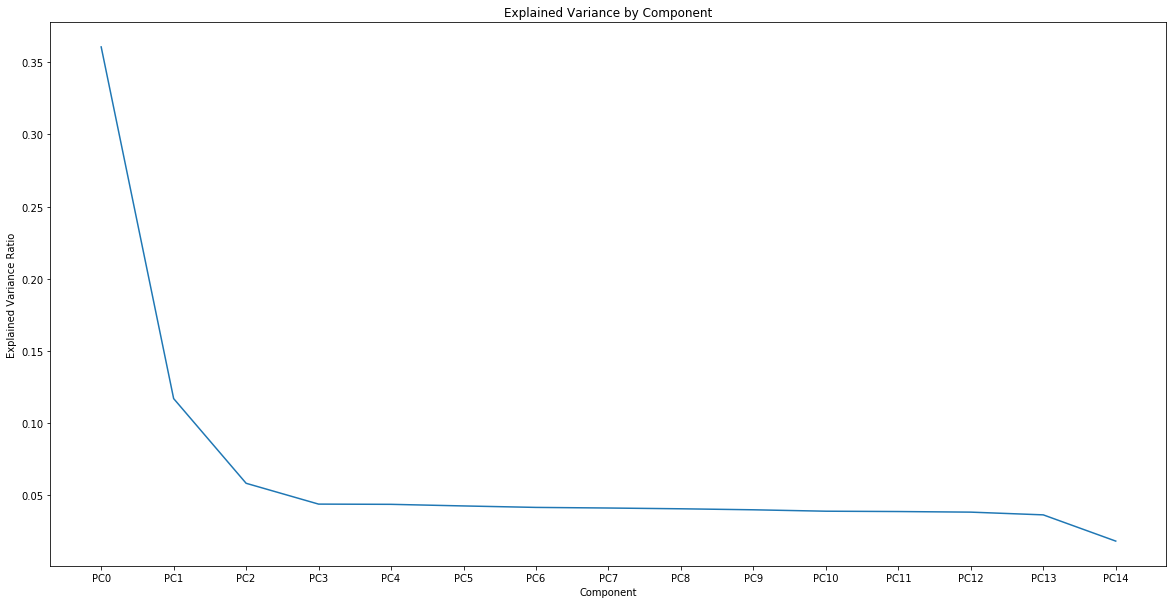

In [33]:
#scree plot

plt.figure(figsize=(20,10))
plt.plot(pcsSummary[1:2].transpose())
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')

The elbow rule for the scree plot using MinMax scaler indicates that 4 PCA components (PC0 - PC3) could be used for analysis.

In [34]:
#PCA- component analysis for each feature in the dataset

pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary.columns, 
                                index=scaled_data.iloc[:,0:15].columns)
pcsComponents_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
TARGET,0.578404,0.001522,0.760620,0.035650,-0.143260,-0.105369,0.017375,0.044922,-0.062649,-0.147281,-0.071098,0.035755,0.026696,-0.069216,-0.119303
FixedAcidity,-0.016246,0.017173,-0.110797,-0.171053,-0.027849,-0.488309,0.025387,-0.181540,-0.175821,-0.358116,-0.480503,-0.228286,0.319586,0.313685,0.205894
VolatileAcidity,-0.028530,0.014123,-0.125457,0.043833,-0.021423,-0.001688,0.280168,0.312088,0.204782,-0.303377,-0.502118,0.540343,-0.310564,-0.173373,0.019891
CitricAcid,0.003651,0.004768,-0.007897,-0.206530,-0.023837,-0.109919,0.023177,-0.734489,0.031910,-0.143642,0.237639,0.506405,0.058804,-0.244041,0.083678
ResidualSugar,0.006269,-0.006687,0.025061,0.224293,0.531317,0.388732,-0.247315,-0.062983,-0.352269,-0.558334,0.040525,0.013359,-0.078592,0.081119,0.005489
Chlorides,-0.010427,0.023452,-0.097780,0.420340,-0.411706,-0.141091,-0.717932,0.047312,0.089570,-0.049140,-0.010815,0.269468,0.043375,0.144406,0.010964
FreeSulfurDioxide,0.010663,0.001941,0.131158,-0.023408,0.608373,-0.400027,-0.225473,0.008228,0.605521,0.050201,0.054069,-0.021849,-0.127962,0.104734,-0.034161
TotalSulfurDioxide,0.014437,-0.023837,0.120933,0.162660,0.249175,0.099204,-0.030578,-0.275614,-0.273691,0.613837,-0.471436,0.252345,-0.074001,0.255752,-0.028180
Density,-0.012685,0.005189,-0.062162,0.749608,0.065931,-0.397439,0.434843,-0.072244,-0.136010,-0.004726,0.225633,-0.037300,-0.025451,-0.066673,0.038824
pH,-0.003290,0.007372,0.016689,0.032637,0.153268,0.132546,0.171958,0.263901,0.110317,0.019903,0.142482,0.394161,0.778815,0.236065,-0.088367


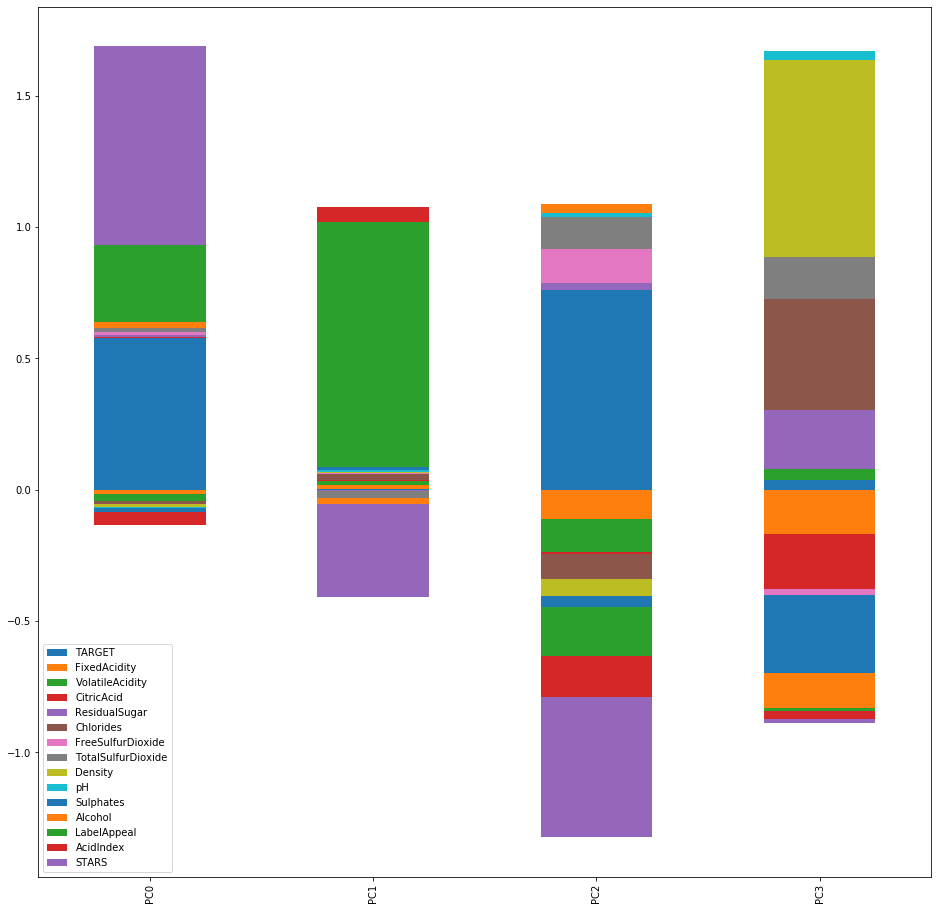

In [35]:
#Analysis of the first 3 components using stacked bar plot

pcsComponents_df[['PC0','PC1','PC2', 'PC3']].transpose().plot(kind='bar', stacked=True,figsize=(16, 16))

### Analysis of PC0 - PC3 components

- PC0 : largely contains useful information on STARS, LabelAppeal & TARGET features
- PC1 : largely contains useful information on STARS & LabelAppeal features
- PC2 : largely contains useful information on STARS, LabelAppeal, TARGET & AcidIndex features
- PC3 : largely contains useful information on Density, Chlorides and Sulphates features

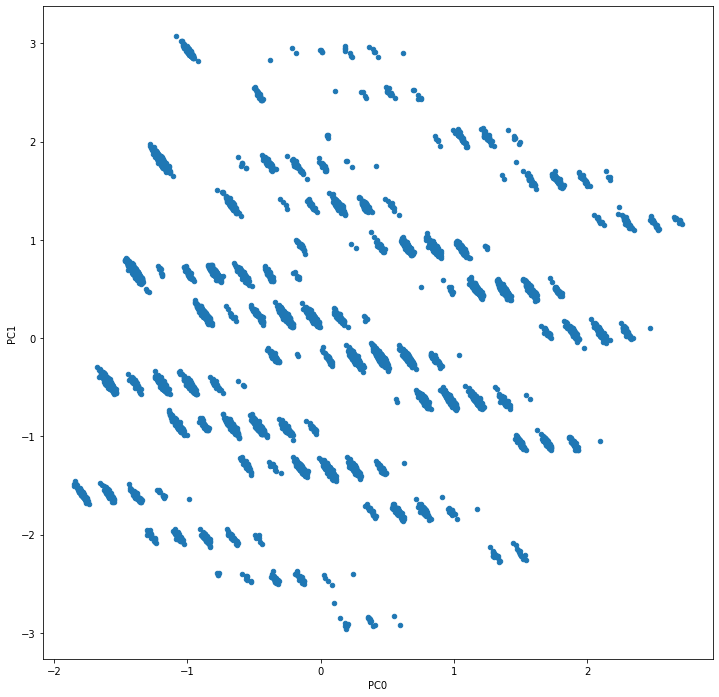

In [36]:
#Scatter plot of PC0 vs PC1

scores.plot.scatter(x='PC0', y='PC1',figsize=(12, 12)) # plot first 2 components

In [ ]:
#Determining the Silhouette score and inertia of the cluster by using 4 Principal Components

col_used=['PC0', 'PC1', 'PC2', 'PC3'] #number of components used

silhouette=[] 
inertia=[]
clusters=[]
for i in range(2,25):  #Iterating until 30 where we see declining silhouette and/or flattening of inertia
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scores[col_used])
    silhouette.append(silhouette_score(scores[col_used],kmeans.labels_)) #creating a list of silhouette scores
    inertia.append(kmeans.inertia_) #creating the list of inertia
    clusters.append(i)
    
print('The max silhouette value is: ',max(silhouette))

In [39]:
#Evaluating KMeans Clustering for the dataset

kmeans_eval=pd.DataFrame({'silhouette_score': silhouette,'inertia': inertia,},index=clusters) #put silhouette and inertia in df
kmeans_eval.head(8)

,silhouette_score,inertia
2,0.242144,41339.738732
3,0.233252,33551.737085
4,0.240989,28365.859952
5,0.234598,25013.768859
6,0.230951,22921.680077
7,0.232437,21089.350881
8,0.215680,19835.755857
9,0.212783,18748.378666


The maximum Silhouette score is for a k value of 4

Text(0.5, 1.0, 'Scree Plot Inertia')

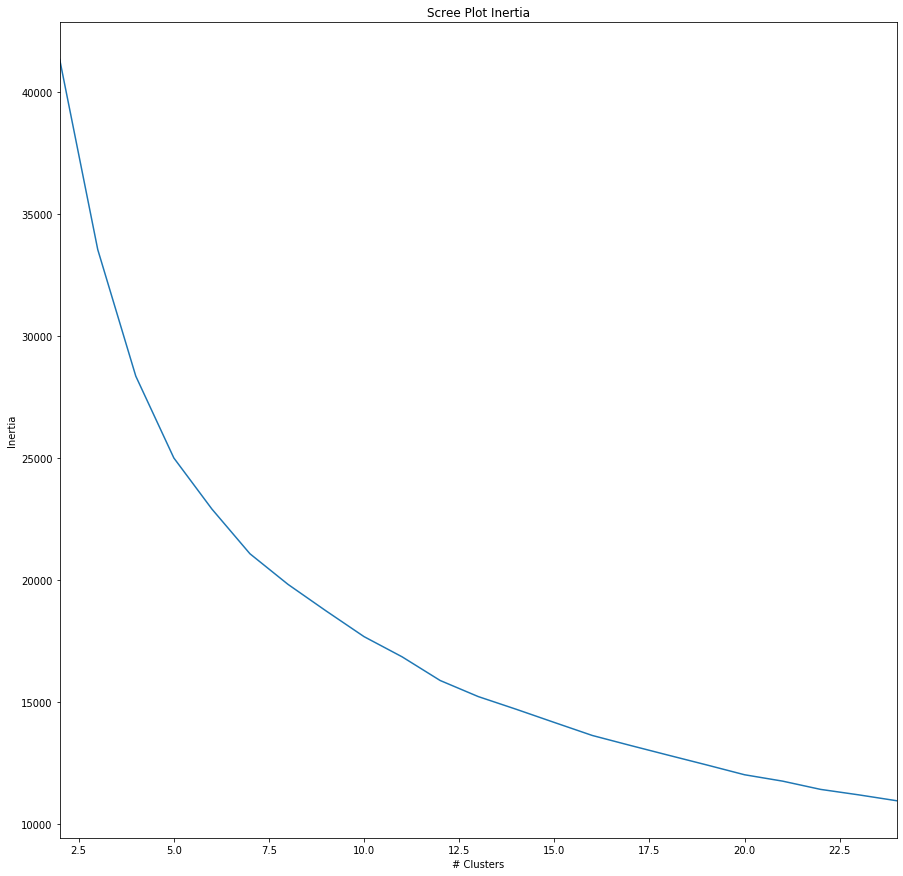

In [40]:
#Plotting the Scree Plot Inertia to identify the likely number of clusters

kmeans_eval['inertia'].plot(figsize=(15, 15))#use elbow method of finding # of components to cluster
plt.xlabel('# Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot Inertia')

Based on the elbow rule, the scree plot indicates that around 8 clusters can be used for KMeans clustering

Text(0.5, 1.0, 'Silhouette score by # of clusters')

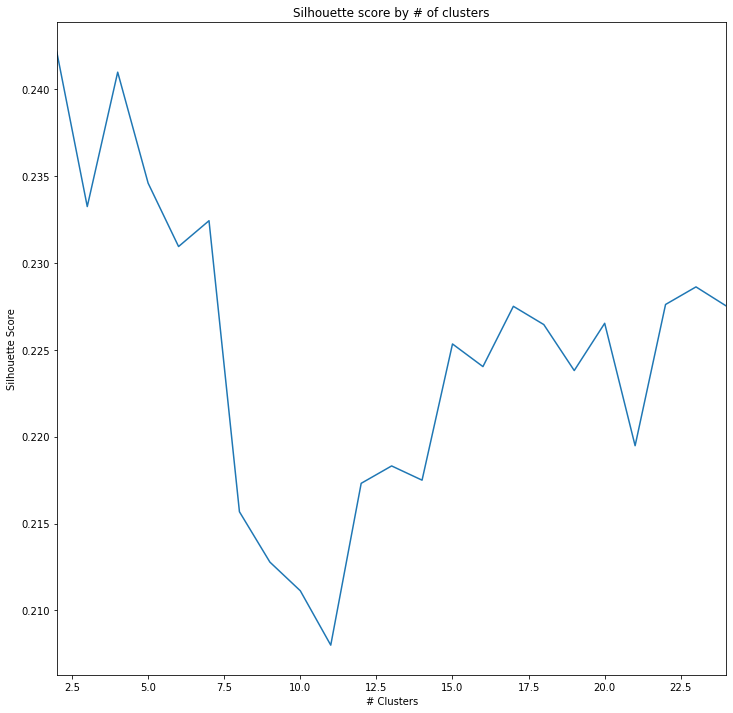

In [41]:
#Silhouette score plot further gives an idea on the number of clusters

kmeans_eval['silhouette_score'].plot(figsize=(12, 12)) #plot silhouete_score to visually look for highest value & corresponding cluster
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette score by # of clusters')

The plot peaks at a value of 4. Hence choosing to divide the data into 4 clusters

In [42]:
print(kmeans_eval['silhouette_score'])

2     0.242144
3     0.233252
4     0.240989
5     0.234598
6     0.230951
7     0.232437
8     0.215680
9     0.212783
10    0.211130
11    0.207999
12    0.217317
13    0.218318
14    0.217499
15    0.225341
16    0.224038
17    0.227509
18    0.226457
19    0.223810
20    0.226531
21    0.219483
22    0.227614
23    0.228626
24    0.227521
Name: silhouette_score, dtype: float64


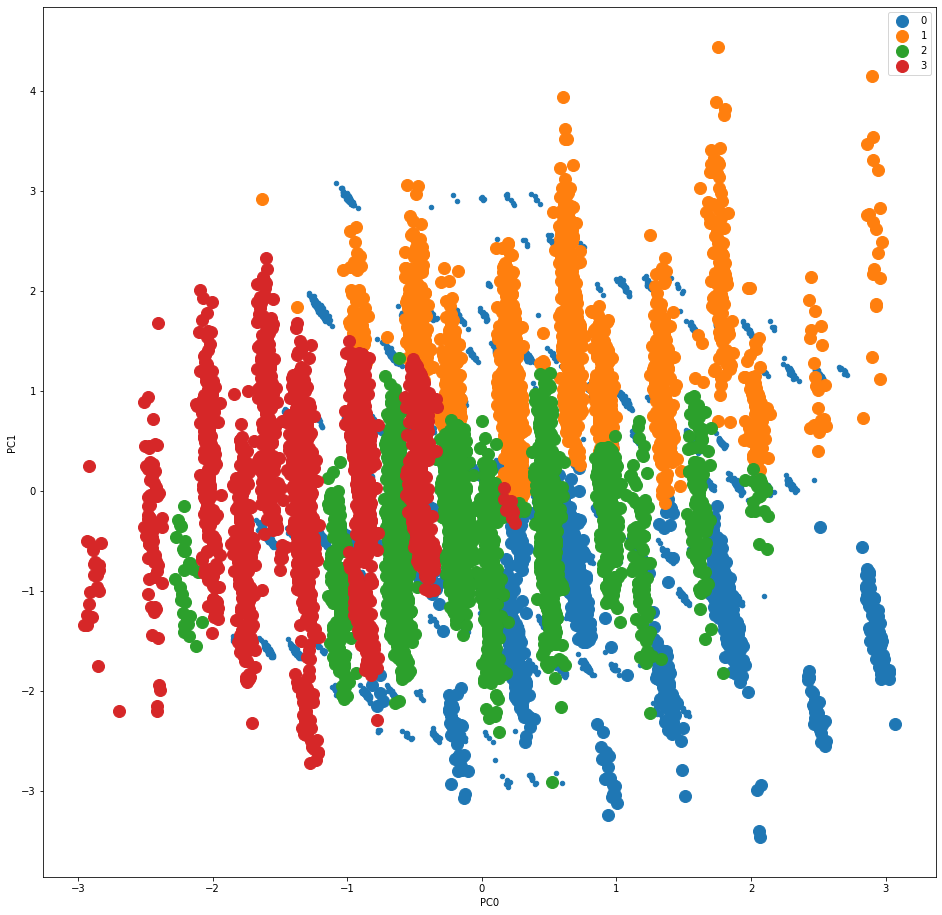

In [43]:
#Taking clusters 4 provides a well define plot

cols=['PC0','PC1', 'PC2', 'PC3'] # PCA Components used for clustering

kmeans= KMeans(n_clusters=4).fit(scores[cols]) 
scores['cluster']=kmeans.labels_

groups = scores.groupby('cluster')

scaled_data['cluster']=scores['cluster']
ax = scores.plot.scatter(x='PC0', y='PC1', figsize=(16, 16))
points = scores[['PC0','PC1']]


for name, group in groups: 
    ax.plot(group.PC1, group.PC2, marker='o', linestyle='', ms=12, label=name) #grouping subplots
ax.legend() 

The dataset is divided into 4 different clusters<br><br>
<font color = 'blue'>Cluster 0 : Cluster having high STARS, LabelAppeal & TARGET features<br>
    <font color = 'orange'>Cluster 1 : Cluster having medium STARS, LabelAppeal & TARGET features<br>
        <font color = 'green'>Cluster 2 : Cluster having very low STARS, LabelAppeal & TARGET features<br>
            <font color = 'red'>Cluster 3 : Cluster having low STARS, LabelAppeal & TARGET features

<font size = "4"><font color='blue'><br>3. BUILD MODELS</br>

In [44]:
scaled_data.columns

Index(['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS', 'ResidualSugar_missing', 'Chlorides_missing',
       'FreeSulfurDioxide_missing', 'TotalSulfurDioxide_missing', 'pH_missing',
       'Sulphates_missing', 'Alcohol_missing', 'STARS_missing',
       'LabelAppeal_bin', 'pH_bin', 'Alcohol_bin', 'STARS_bin', 'cluster'],
      dtype='object')

In [45]:
# Data Partitioning

predictors = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS']

outcome = 'TARGET'

X = pd.get_dummies(scaled_data[predictors], drop_first=True)
y = scaled_data[outcome]
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.5, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.3, random_state=1)

print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)
print('Test : ', test_X.shape)

#train model using training data
train_X

Training :  (6397, 14)
Validation :  (4478, 14)
Test :  (1920, 14)


,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
7763,0.485714,0.344668,0.914085,0.249117,0.339810,0.478778,0.499734,0.582619,0.509735,0.540027,0.842949,0.75,0.554700,0.50
422,0.045714,0.415765,0.464789,0.285927,0.729183,0.491511,0.770213,0.506323,0.495575,0.617368,0.371795,0.75,0.620174,0.25
9428,0.607619,0.533230,0.254930,0.481874,0.732355,0.943124,0.680319,0.519583,0.536283,0.500678,0.467949,0.75,0.554700,0.50
1095,0.405714,0.521638,0.267606,0.496747,0.482554,0.738540,0.542553,0.125030,0.591150,0.521031,0.198718,0.50,0.392232,0.25
2309,0.476190,0.435858,0.674648,0.686373,0.478588,0.298812,0.671809,0.498745,0.389381,0.411126,0.455128,1.00,0.480384,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,0.626667,0.471406,0.488732,0.514594,0.477795,0.339559,0.551064,0.348425,0.527434,0.795115,0.637821,0.50,0.277350,0.25
905,0.413333,0.523957,0.504225,0.661089,0.291039,0.466893,0.503723,0.515794,0.231858,0.290366,0.500000,0.25,0.554700,0.75
5192,0.447619,0.267388,0.566197,0.699015,0.622522,0.448217,0.210638,0.522377,0.745133,0.332429,0.467949,0.75,0.554700,1.00
12172,0.653333,0.443586,0.516901,0.523517,0.417129,0.731749,0.528723,0.274118,0.460177,0.439620,0.358974,0.75,0.480384,0.50


<font color = red> Regression Model

In [46]:
def findsubsets(s, n): 
    return list(map(set, itertools.combinations(s, n)))

In [47]:
def exhaustive(model,train_X,train_y,valid_X,valid_y):
    low_err=600000**2

    for x in range(len(train_X.columns),0,-1):
        n=x
        ss=findsubsets(train_X.columns,n)
        print("_"*50)
        print(str(len(ss))+" model(s) using "+ str(n)+ " features")
        for z in range(0,len(ss)):
        
            model = model
            reg  = model.fit(train_X[ss[z]], train_y)
            
            pred_train = reg.predict(train_X[ss[z]])
            mse_train= mean_squared_error(train_y, pred_train)
            rmse_train=mse_train**.5
            mad_train=mean_absolute_error(train_y,pred_train)
                        
            pred_valid = reg.predict(valid_X[ss[z]])
            mse_valid= mean_squared_error(valid_y, pred_valid)
            rmse_valid=mse_valid**.5
            mad_valid=mean_absolute_error(valid_y,pred_valid)
        
            if rmse_valid < low_err:
                low_err=rmse_valid
                low_err_features=list(ss[z])
                print("_"*100)
                print(low_err_features)
                print("_"*50)
                print("train mse: "+str(mse_train))
                print("train rmse: "+str(rmse_train))
                print("train mad: "+str(mad_train))
                print("valid mse: "+str(mse_valid))
                print("valid rmse: "+str(rmse_valid))
                print("valid mad: "+str(mad_valid))
                abs(valid_y-pred_valid).hist()
                plt.show()                      

__________________________________________________
1 model(s) using 14 features
____________________________________________________________________________________________________
['ResidualSugar', 'Chlorides', 'CitricAcid', 'FreeSulfurDioxide', 'pH', 'Alcohol', 'STARS', 'FixedAcidity', 'VolatileAcidity', 'LabelAppeal', 'Sulphates', 'TotalSulfurDioxide', 'AcidIndex', 'Density']
__________________________________________________
train mse: 0.027803369206843166
train rmse: 0.16674342327913017
train mad: 0.13453577935163782
valid mse: 0.02720391094934175
valid rmse: 0.16493608140531818
valid mad: 0.13396654913048422


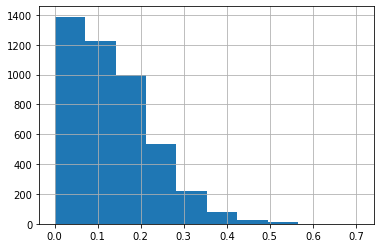

__________________________________________________
14 model(s) using 13 features
____________________________________________________________________________________________________
['ResidualSugar', 'Chlorides', 'CitricAcid', 'FreeSulfurDioxide', 'Alcohol', 'STARS', 'FixedAcidity', 'VolatileAcidity', 'LabelAppeal', 'Sulphates', 'TotalSulfurDioxide', 'AcidIndex', 'Density']
__________________________________________________
train mse: 0.027816011933385926
train rmse: 0.1667813296906639
train mad: 0.13455637333636397
valid mse: 0.02720092094505265
valid rmse: 0.16492701702587315
valid mad: 0.13397043148780993


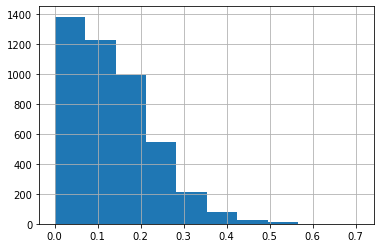

____________________________________________________________________________________________________
['ResidualSugar', 'Chlorides', 'CitricAcid', 'FreeSulfurDioxide', 'pH', 'Alcohol', 'STARS', 'VolatileAcidity', 'LabelAppeal', 'Sulphates', 'TotalSulfurDioxide', 'AcidIndex', 'Density']
__________________________________________________
train mse: 0.027811236970385764
train rmse: 0.1667670140357072
train mad: 0.13458938715781626
valid mse: 0.027181983755221684
valid rmse: 0.164869596212345
valid mad: 0.13387815068983427


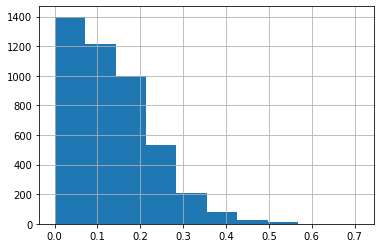

__________________________________________________
91 model(s) using 12 features
____________________________________________________________________________________________________
['ResidualSugar', 'Chlorides', 'CitricAcid', 'FreeSulfurDioxide', 'pH', 'STARS', 'VolatileAcidity', 'LabelAppeal', 'Sulphates', 'TotalSulfurDioxide', 'AcidIndex', 'Density']
__________________________________________________
train mse: 0.02784033813702372
train rmse: 0.16685424219067288
train mad: 0.13464650116595334
valid mse: 0.02718176158536248
valid rmse: 0.16486892243646914
valid mad: 0.1339804430351566


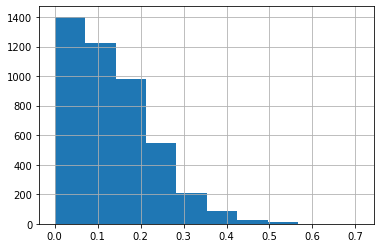

____________________________________________________________________________________________________
['ResidualSugar', 'Chlorides', 'CitricAcid', 'FreeSulfurDioxide', 'Alcohol', 'STARS', 'VolatileAcidity', 'LabelAppeal', 'Sulphates', 'TotalSulfurDioxide', 'AcidIndex', 'Density']
__________________________________________________
train mse: 0.02782382888076367
train rmse: 0.16680476276402803
train mad: 0.13460071945765878
valid mse: 0.027179182143749443
valid rmse: 0.16486109954670763
valid mad: 0.13387464901859336


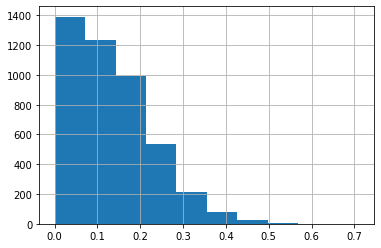

__________________________________________________
364 model(s) using 11 features
____________________________________________________________________________________________________
['ResidualSugar', 'Chlorides', 'CitricAcid', 'FreeSulfurDioxide', 'STARS', 'VolatileAcidity', 'LabelAppeal', 'Sulphates', 'TotalSulfurDioxide', 'AcidIndex', 'Density']
__________________________________________________
train mse: 0.027853691465965384
train rmse: 0.16689425234550584
train mad: 0.13466801943703294
valid mse: 0.02717877308630285
valid rmse: 0.16485985892964622
valid mad: 0.13398380715797503


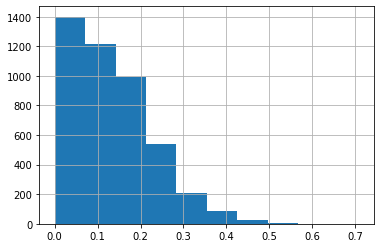

____________________________________________________________________________________________________
['Chlorides', 'CitricAcid', 'FreeSulfurDioxide', 'Alcohol', 'STARS', 'VolatileAcidity', 'LabelAppeal', 'Sulphates', 'TotalSulfurDioxide', 'AcidIndex', 'Density']
__________________________________________________
train mse: 0.027823913936993173
train rmse: 0.16680501772126993
train mad: 0.13459939262704534
valid mse: 0.02717819168427061
valid rmse: 0.16485809559821626
valid mad: 0.13387129851735555


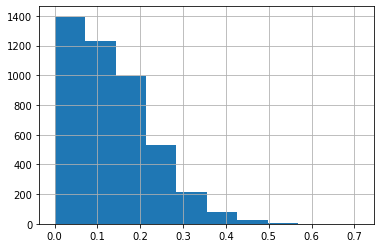

__________________________________________________
1001 model(s) using 10 features
____________________________________________________________________________________________________
['Chlorides', 'CitricAcid', 'FreeSulfurDioxide', 'STARS', 'VolatileAcidity', 'LabelAppeal', 'Sulphates', 'TotalSulfurDioxide', 'AcidIndex', 'Density']
__________________________________________________
train mse: 0.027853738919485074
train rmse: 0.1668943945118741
train mad: 0.13466666918239234
valid mse: 0.027178022943310856
valid rmse: 0.16485758382103888
valid mad: 0.13398146926399712


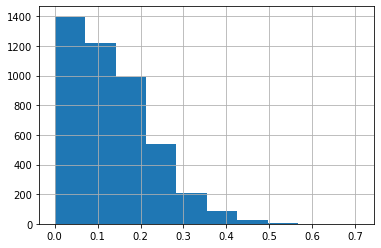

__________________________________________________
2002 model(s) using 9 features
__________________________________________________
3003 model(s) using 8 features
__________________________________________________
3432 model(s) using 7 features
__________________________________________________
3003 model(s) using 6 features
__________________________________________________
2002 model(s) using 5 features
__________________________________________________
1001 model(s) using 4 features
__________________________________________________
364 model(s) using 3 features
__________________________________________________
91 model(s) using 2 features
__________________________________________________
14 model(s) using 1 features


In [48]:
exhaustive(model=LinearRegression(normalize=False,n_jobs=-1),
           train_X=train_X, train_y=train_y,valid_X=valid_X,valid_y=valid_y )

### Observations :
#### 364 model(s) using the below 11 features is the MULTIPLE LINEAR REGRESSION model with the least RMSE error for the Validation dataset :
['Density', 'Chlorides', 'Alcohol', 'LabelAppeal', 'AcidIndex', 'TotalSulfurDioxide', 
 'FreeSulfurDioxide', 'VolatileAcidity', 'CitricAcid', 'Sulphates', 'STARS']

- valid mse: 0.027178022943310856
- valid rmse: 0.16485758382103888
- valid mad: 0.13398146926399712

### Regularization / Shrinkage:
- Regularization/Shrinkage -> “shrinks” the coefficients towards zero.

In [49]:
def reg_shrink(model,train_X,train_y,valid_X,valid_y):
        model = model
        reg  = model.fit(train_X, train_y)
        
        
        pred_train = reg.predict(train_X)
        mse_train= mean_squared_error(train_y, pred_train)
        rmse_train=mse_train**.5
        mad_train=mean_absolute_error(train_y,pred_train)
                        
        pred_valid = reg.predict(valid_X)
        mse_valid= mean_squared_error(valid_y, pred_valid)
        rmse_valid=mse_valid**.5
        mad_valid=mean_absolute_error(valid_y,pred_valid)

        print("train mse: "+str(mse_train))
        print("train rmse: "+str(rmse_train))
        print("train mad: "+str(mad_train))
        print("valid mse: "+str(mse_valid))
        print("valid rmse: "+str(rmse_valid))
        print("valid mad: "+str(mad_valid))
        abs(valid_y-pred_valid).hist()
        
        coefficients=pd.DataFrame(reg.coef_)
        coefficients.index=train_X.columns
        print(coefficients)


train mse: 0.027805959767246948
train rmse: 0.166751191201883
train mad: 0.13459985189930074
valid mse: 0.027207594140653046
valid rmse: 0.1649472465385617
valid mad: 0.13402984982553134
                           0
FixedAcidity       -0.020628
VolatileAcidity    -0.069642
CitricAcid          0.006320
ResidualSugar       0.000000
Chlorides          -0.038598
FreeSulfurDioxide   0.030791
TotalSulfurDioxide  0.044277
Density            -0.022641
pH                 -0.025973
Sulphates          -0.017469
Alcohol             0.040908
LabelAppeal         0.196766
AcidIndex          -0.363309
STARS               0.496654


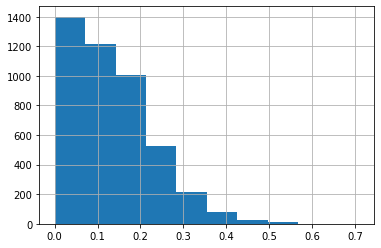

In [50]:
reg_shrink(model=LassoCV(normalize=True,cv=5), 
           train_X=train_X, train_y=train_y,valid_X=valid_X,valid_y=valid_y )

### Observations :
#### The LASSO CV model with the least RMSE error for the Validation dataset has the below error metrics :

- valid mse: 0.027207594140653046
- valid rmse: 0.1649472465385617
- valid mad: 0.13402984982553134

<font color = red> Decision Tree Regressor

Tree has 63 nodes


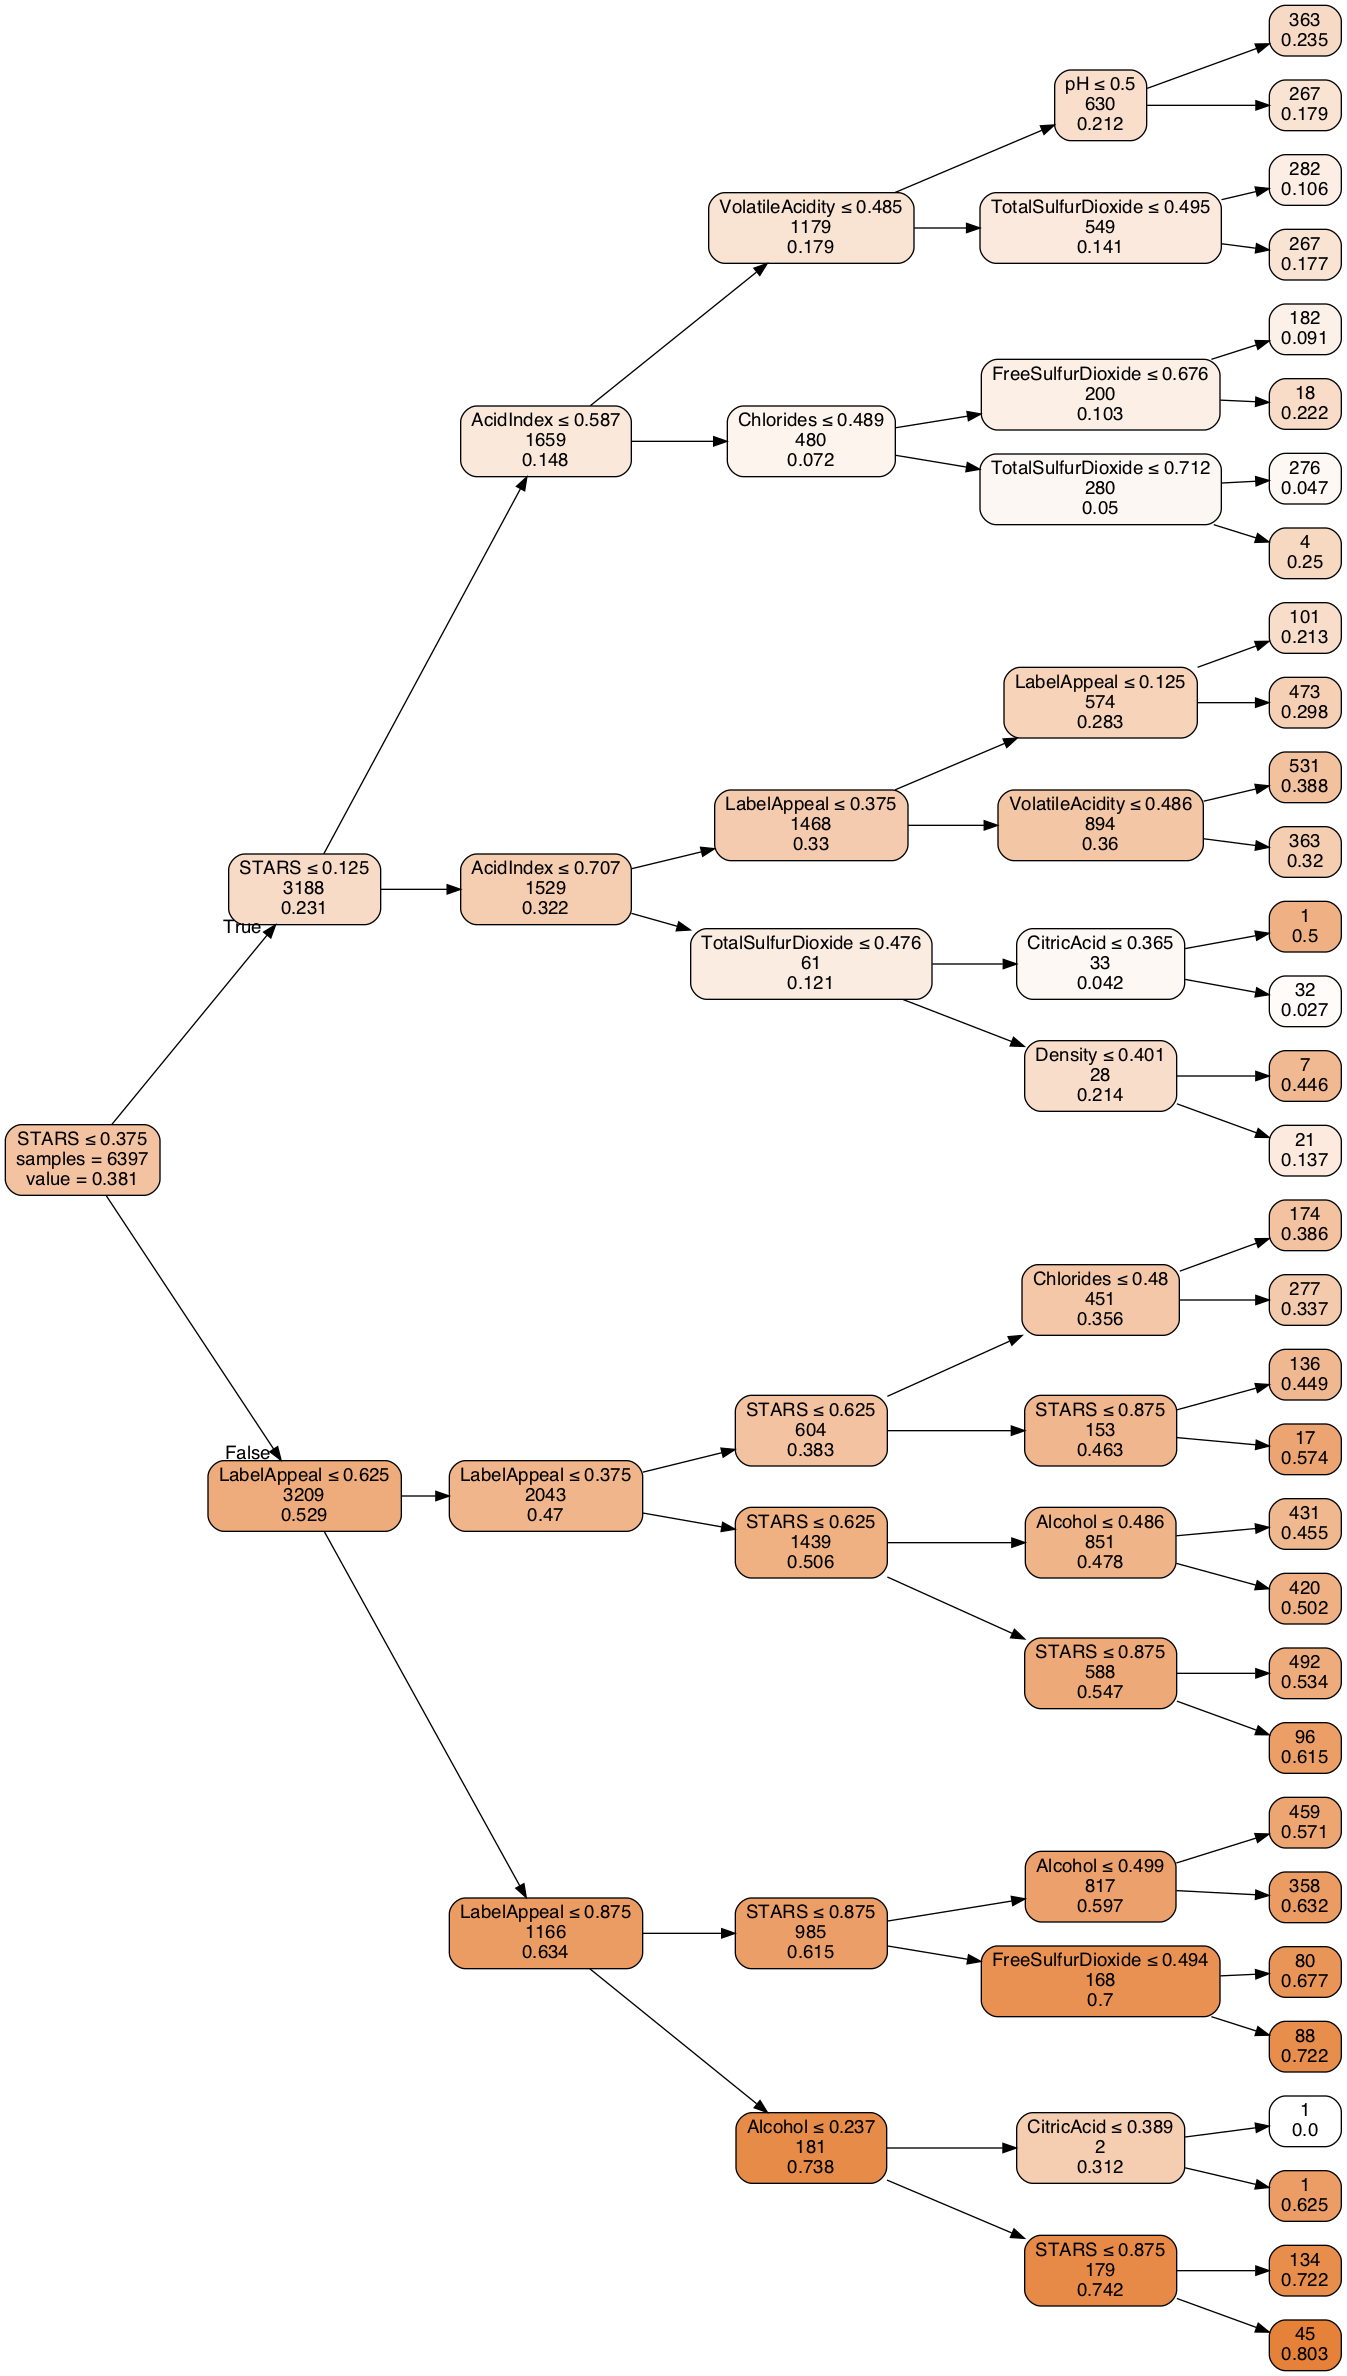

In [51]:
# Shallow tree

shallowTree = DecisionTreeRegressor(max_depth=5)

shallowTree.fit(train_X, train_y)
print('Tree has {} nodes'.format(shallowTree.tree_.node_count))
plotDecisionTree(shallowTree, feature_names=train_X.columns, rotate=True, impurity=False)

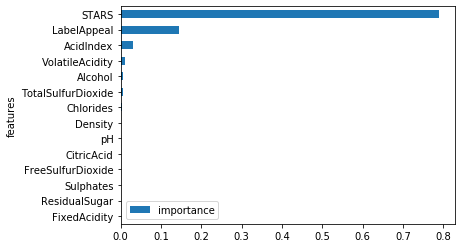

In [52]:
# Variable importance

importance_shallow = pd.DataFrame({'features': train_X.columns, 
                           'importance': shallowTree.feature_importances_})
importance_shallow.index=importance_shallow.features
importance_shallow.sort_values(by='importance', ascending=True).plot.barh()

STARS, LabelAppeal, ACidIndex and VolatileAcidity seem to be the prime contributers to TARGET in the shallow tree

In [53]:
print("Prediction error of Validation set for the Shallow Tree")
print("RMSE: ", str(mean_squared_error(valid_y, shallowTree.predict(valid_X))**.5))

Prediction error of Validation set for the Shallow Tree
RMSE:  0.15891125045260623


<font color =red> Random Forest Regressor

In [54]:
# user grid search to find optimized tree - RandomForestRegressor

param_grid = {
    'max_depth': [9],
    'min_samples_split':[5],
    'max_leaf_nodes': [52],
}
gridSearch = GridSearchCV(RandomForestRegressor(random_state=1), 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

rf = gridSearch.best_estimator_

print("RMSE: "+str(mean_squared_error(valid_y, rf.predict(valid_X))**.5))

Improved parameters:  {'max_depth': 9, 'max_leaf_nodes': 52, 'min_samples_split': 5}
RMSE: 0.15665386718673305


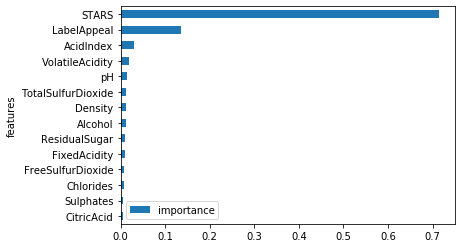

In [55]:
# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': rf.feature_importances_})
importance.index=importance.features
importance.sort_values(by='importance', ascending=True).plot.barh()

<font color = red> Gradient Boosting Regressor

In [56]:
# user grid search to find optimized tree - GradientBoostingRegressor

param_grid = {
    
    'learning_rate':list(np.arange(0.01,0.22,.01)),  #choose initial high learning rate
    'min_samples_split': list(np.arange(3,7)),
    'max_leaf_nodes': list(np.arange(4,7)), 
}

gridSearch = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

gbm = gridSearch.best_estimator_

print("RMSE: "+str(mean_squared_error(valid_y, gbm.predict(valid_X))**.5))

Improved parameters:  {'learning_rate': 0.09999999999999999, 'max_leaf_nodes': 6, 'min_samples_split': 6}
RMSE: 0.15421767690649768


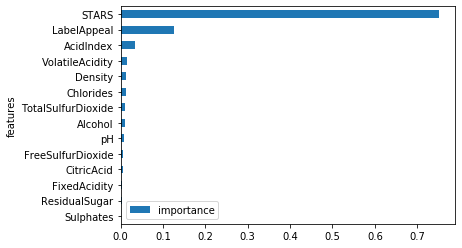

In [68]:
# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': gbm.feature_importances_})
importance.index=importance.features
importance.sort_values(by='importance', ascending=True).plot.barh()

<font size = "4">Shallow Tree &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;-- RMSE : 0.1595686133804205    
            <font size = "4">Random Forest Regressor &nbsp;&nbsp;&nbsp;&nbsp;-- RMSE : 0.15665386718673305<br>
                <font size = "4">Gradient Boosting Regressor -- RMSE : 0.15421767690649768<br><br>
                    From the above models, the GridSearchCV seems to be more accurate with lower RMSE than the fully grown or the shallow tree. <br>Particularly, the Grid Search CV using the Gradient Boosting regressor seems to have the lowest RMSE.

<font color =red> AdaBoost Regressor

In [31]:
clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8,min_samples_split=5,
                                               min_samples_leaf=5,max_features=14,random_state=1), 
                         n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
print("RMSE of Validation: "+str((mean_squared_error(valid_y, clf.predict(valid_X))**.5)))
print("RMSE of Training: "+str((mean_squared_error(train_y, clf.predict(train_X))**.5)))

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=8,
                                                       max_features=14,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=5,
                                                       min_samples_split=5,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=1,
                                                       splitter='best'),
                  learn

<font color =red> Bagging Regressor

In [33]:
clf = BaggingRegressor(DecisionTreeRegressor(max_depth=6,min_samples_split=2,
                                               min_samples_leaf=5,max_features=10,random_state=1),
                        n_estimators=100, random_state=1)

param_grid = {}
gridSearch = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

clf = gridSearch.best_estimator_

print(clf)
print("RMSE of Validation: "+str((mean_squared_error(valid_y, clf.predict(valid_X))**.5)))
print("RMSE of Training: "+str((mean_squared_error(train_y, clf.predict(train_X))**.5)))

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=6,
                                                      max_features=10,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=5,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=1,
                                                      splitter='best'),
                 bootstrap=True, boo

### Observations :
#### The Bagging Regressor model has lower RMSE error for the Validation dataset than the AdaBoost model :

- Bagging Regressor RMSE: 0.15578566806533456
- AdaBoost Regressor: 0.165751590900094

 <font color =red> MLP Regressor

In [100]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='lbfgs')

param_grid = {}
gridSearch = GridSearchCV(mlp_model, param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

mlp_model = gridSearch.best_estimator_

print(mlp_model)
print("RMSE of Validation: "+str((mean_squared_error(valid_y, mlp_model.predict(valid_X))**.5)))
print("RMSE of Training: "+str((mean_squared_error(train_y, mlp_model.predict(train_X))**.5)))

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)
RMSE of Validation: 0.15799740428780085
RMSE of Training: 0.15589077933835488


<font size = "4"><font color='blue'><br>4. MODEL SELECTION</br>

<font size = 4><font color='purple'>The Models and the associated RMSE for the WINE database are summarized below:<br>

| Model | RMSE |
| --- | --- |
| Linear Regression | 0.16485758382103888 |
| LassoCV model | 0.1649472465385617 |
| Decision Tree Regressor | 0.1595686133804205 |
| Random Forest Regressor | 0.15665386718673305 |
| Gradient Boosting Regressor | 0.16485758382103888 |
| AdaBoost Regressor | 0.165751590900094 |
| Bagging Regressor | 0.15578566806533456 |
| MLP Regressor | - 0.15799740428780085 |

### Conclusion

The ________ model seems to have the lowest RMSE for the validation set. This model can be used to test/predict the number of TARGET wine bottles that will be sold based on the wine properties.

#### Justification

The reason for choosing the model is ...